# About Dataset aggregate_covid_country.csv

# Loading Dataset

In [1]:
import pandas as pd
df_covid = pd.read_csv('aggregate_covid_country.csv')
df_covid.head() #Printing first 5 rows

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [2]:
#Checking dimesion
df_covid.shape

(23688, 5)

# Preparing Dataset

In [3]:
#Checking dataset information
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


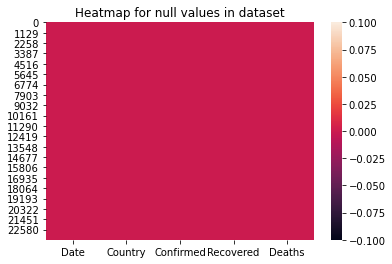

In [4]:
#Displaying null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_covid.isnull())
plt.title('Heatmap for null values in dataset')
plt.show()

# Label Encoding

In [5]:
#Checking unique values of categorical variables.
for i in df_covid.columns:
    if df_covid[i].dtypes == object:
        print(f'%-30s: {len(df_covid[i].unique())}'%i)

Date                          : 126
Country                       : 188


In [6]:
#Appyling label encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = {}
encoded_values = {}
for i in df_covid.columns:
    if df_covid[i].dtypes == object:
        le[i] = LabelEncoder()
        encoded_values[i] = le[i].fit_transform(df_covid[i])
        print(f"%-15s: {le[i].classes_}"%i)

Date           : ['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25' '2020-03-26'
 '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30' '2020-03-31'
 '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04' '2020-

In [7]:
#Replacing the original values with encoded values into new dataframe
df = df_covid.copy()
for i in le.keys():
    df[i] = encoded_values[i]
    
df.head() #Printing first 5 rows of new df

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0


# Statisical Summary

In [8]:
#Checking statistical summary of dataset
df.describe()

,Date,Country,Confirmed,Recovered,Deaths
count,23688.000000,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,62.500000,93.500000,7.969368e+03,2581.801714,526.935030
std,36.372689,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,31.000000,46.750000,0.000000e+00,0.000000,0.000000
50%,62.500000,93.500000,1.800000e+01,1.000000,0.000000
75%,94.000000,140.250000,7.300000e+02,123.000000,13.000000
max,125.000000,187.000000,1.680913e+06,384902.000000,98913.000000


# Exploratory Data Analysis (EDA)

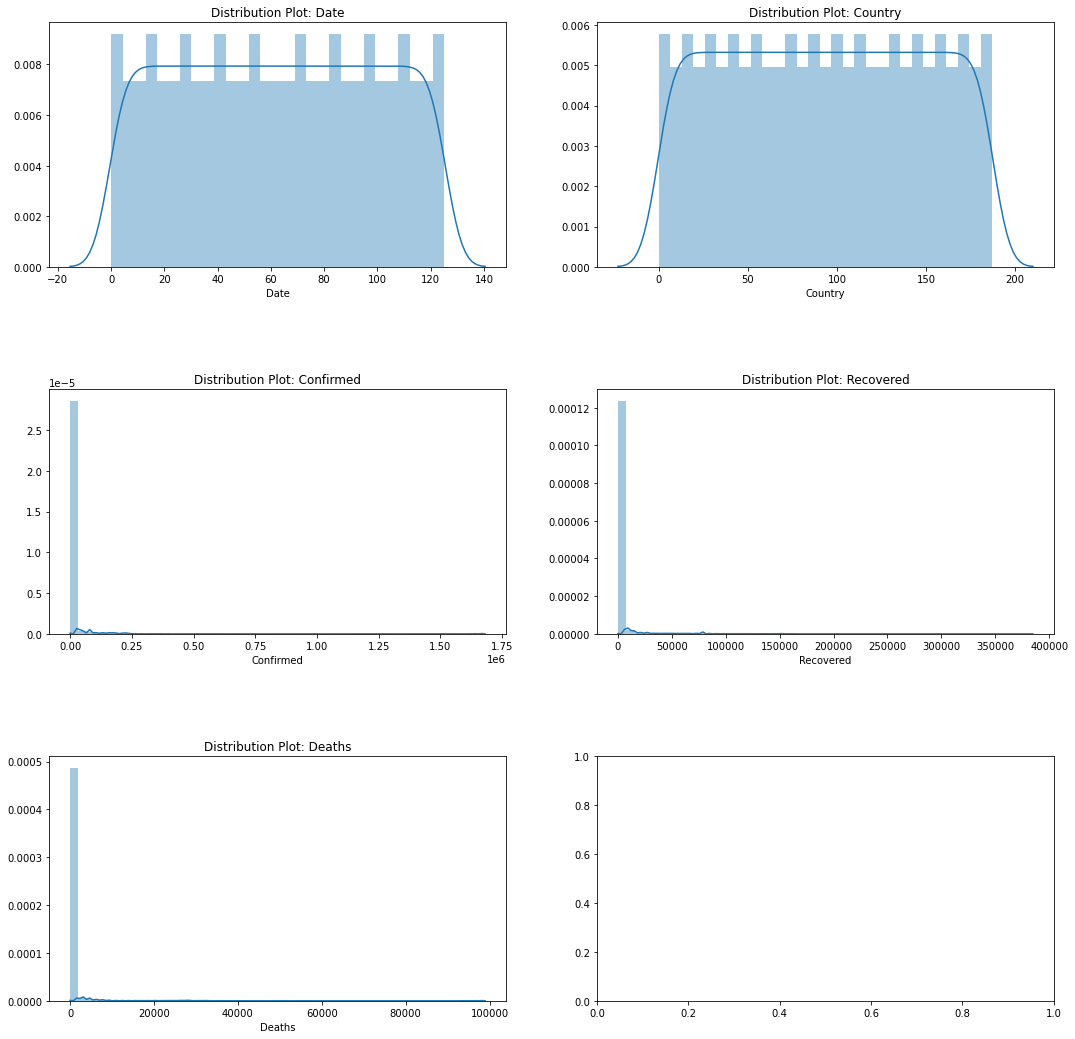

In [9]:
#Checking Distribution of Data in features
rows = 3
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols*3,rows*cols*3))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[df.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df.columns[k]}")
        k = k+1
        if k == 5:
            break;
plt.show()
    

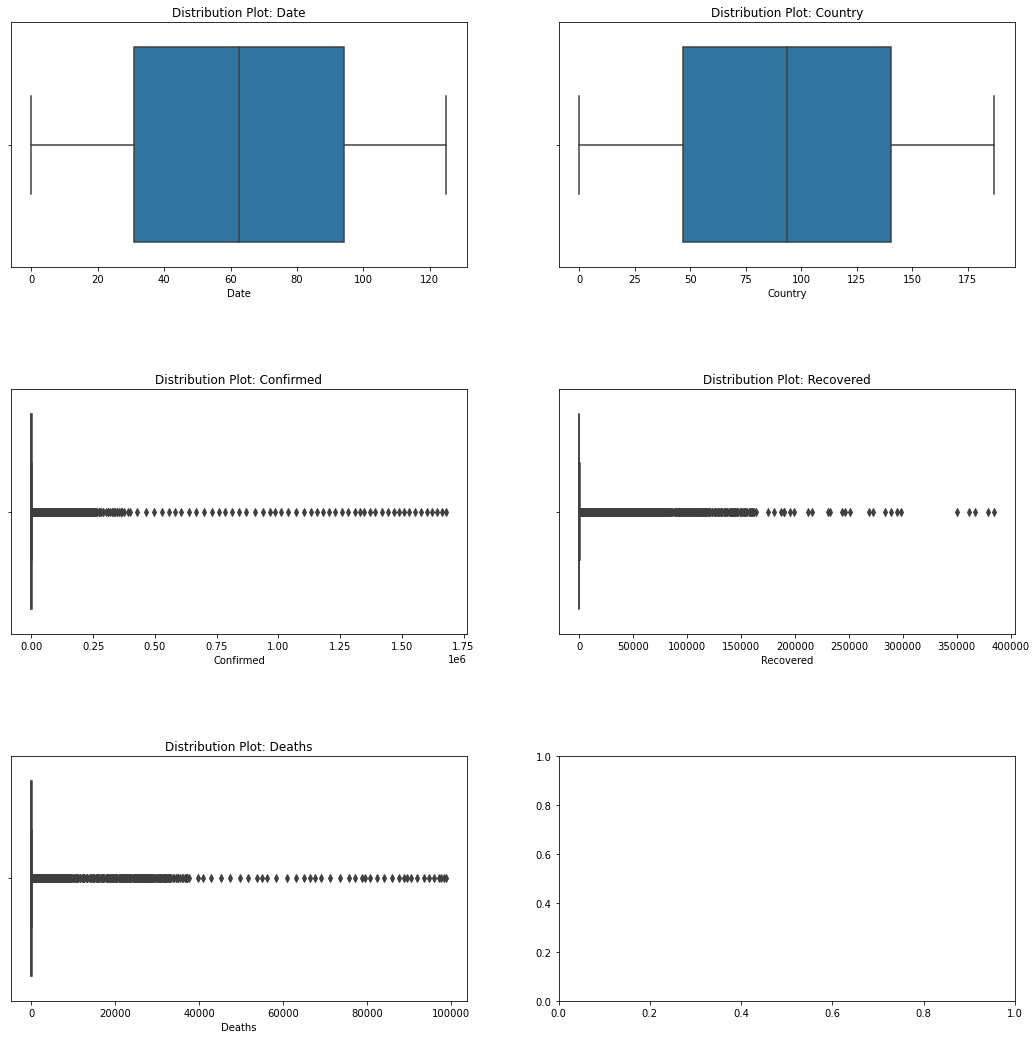

In [10]:
#Checking with box plot
rows = 3
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols*3,rows*cols*3))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(df[df.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df.columns[k]}")
        k = k+1
        if k == 5:
            break;
plt.show()

# Bi-Variate Analysis

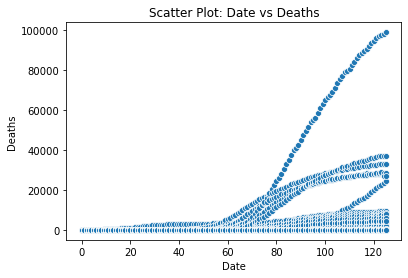

In [11]:
#Checking Feature Date and Deaths with Scatter Plot
x='Date'
y='Deaths'
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}")
plt.show()

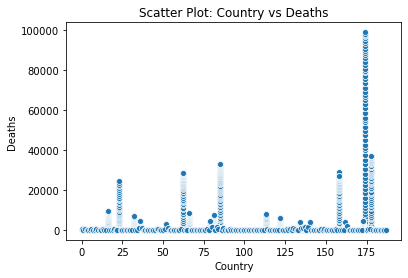

In [12]:
#Checking Feature Country and Deaths with Scatter Plot
x='Country'
y='Deaths'
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}")
plt.show()

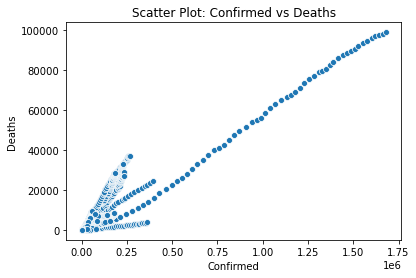

In [13]:
#Checking Feature Confirmed and Deaths with Scatter Plot
x='Confirmed'
y='Deaths'
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}")
plt.show()

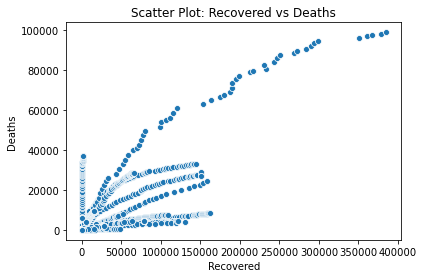

In [14]:
#Checking Feature Recovered and Deaths with Scatter Plot
x='Recovered'
y='Deaths'
sns.scatterplot(x,y,data=df)
plt.title(f"Scatter Plot: {x} vs {y}")
plt.show()

# Multi-Variate Analysis

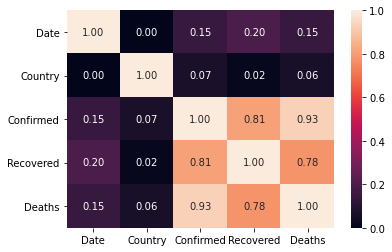

In [15]:
#Checking relationship between features
df_corr = df.corr()

#Displaying correlation of features using heatmap
sns.heatmap(df_corr,annot=True,fmt='.2f')
plt.show()

# Removing Outliers

In [16]:
#Checking outliers with the help of zscore
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
#Printing location of outliers
np.where(z>3)

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
         9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
        11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
        13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
        13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
        14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
        14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
        14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
        15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
        15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
        15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
        15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
        15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
        15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
      

In [17]:
#Removing outliers
df_wo = df[(z<=3).all(axis=1)]
print(f"Orignal Shape: {df.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df)-len(df_wo))*100/len(df)}%")

Orignal Shape: (23688, 5)
New Shape: (23177, 5)
% Loss: 2.157210401891253%


# Skewness

In [18]:
#Checking skewness of data
df.skew()

Date          0.000000
Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

# Preparing Data for Model

In [19]:
#Seperating input and output variables
x = df.drop(columns=['Deaths'])
y = df['Deaths']

In [20]:
#Treating skewness of data
from sklearn.preprocessing import power_transform
x_t = power_transform(x)

In [21]:
#Scaling data for model using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x_t)

# Finding the Best Model

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
#Defining function for best random_state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_r2Score = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        temp_r2Score = r2_score(y_test,predict_y)
        if temp_r2Score>best_r2Score:
            best_r2Score = temp_r2Score
            best_rState = i
            
    return best_rState,best_r2Score


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv,best_cvScore

#Defining function for building models
def build_model(models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        #Finding the best random_state for train test split
        best_rState, best_r2Score = get_best_rstate(r_range,models[i]["name"],x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        r2Score = r2_score(y_test,predict_y)
        mse = mean_squared_error(y_test,predict_y)
        mae = mean_absolute_error(y_test,predict_y)
        
        #Storing model specs.
        models[i]["random_state"] = best_rState
        models[i]["initial_r2_score"] = best_r2Score
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        models[i]["r2_score"] = r2Score
        models[i]["mse"] = mse
        models[i]["rmse"] = np.sqrt(mse)
        models[i]["mae"] = mae
        
    return models;

# Preparing List of Models and Testing for Best Performances

In [24]:
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
#Preparing List of Models with parameters
models = {
    "LinearRegression":{
        "name": LinearRegression(),
        "parameters":{
            "fit_intercept":[True,False],
            "normalize":[True,False]
        }
    },
    "Lasso":{
        "name": Lasso(),
        "parameters":{
            "alpha":[0.1,1.0],
            "fit_intercept":[True,False],
            "normalize":[True,False],
            "selection":['cyclic','random']
        }
    },
    "Ridge":{
        "name": Ridge(),
        "parameters":{
            "alpha":[0.1,1.0],
            "fit_intercept":[True,False],
            "normalize":[True,False],
            "solver":['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
        }
    },
    "SGDRegressor":{
        "name": SGDRegressor(),
        "parameters":{
            "loss":['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],
            "alpha":[0.00001,0.0001],
            "shuffle":[True,False]
        }
    },
    "AdaBoostRegressor":{
        "name": AdaBoostRegressor(),
        "parameters": {
            "loss": ['linear','square','exponential']
        }
    }
}

#Building models
build_models = build_model(models,scaled_x,y)

In [25]:
#Dispalying model performance
for i in build_models:
    model = build_models[i]
    print(f"START: {i}===================\n")
    print(f"Best random_state: {model['random_state']} with best r2_score: {model['initial_r2_score']}\n")
    print(f"Best CV: {model['cv']} with best cross_value_score: {model['cross_val_score']}\n")
    print(f"Best params: {model['gscv'].best_params_}\n")
    print(f"Final Performance:")
    print(f"R2_SCORE: {round(model['r2_score']*100,2)}%\t MSE: {model['mse']}\t RMSE: {model['rmse']}\t MAE: {model['mae']}\n")
    print(f"END: {i}=====================\n\n\n")

START: LinearRegression===================

Best random_state: 56 with best r2_score: 0.0829038614705957

Best CV: 5 with best cross_value_score: 0.06531085200268649

Best params: {'fit_intercept': True, 'normalize': False}

Final Performance:
R2_SCORE: 8.29%	 MSE: 12852040.965147413	 RMSE: 3584.9743325646577	 MAE: 1172.9269866014395

END: LinearRegression=====================



START: Lasso===================

Best random_state: 56 with best r2_score: 0.0828862690127441

Best CV: 5 with best cross_value_score: 0.06536786019915916

Best params: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'selection': 'cyclic'}

Final Performance:
R2_SCORE: 8.25%	 MSE: 12857203.425490508	 RMSE: 3585.694273845793	 MAE: 1159.4691963693956

END: Lasso=====================



START: Ridge===================

Best random_state: 56 with best r2_score: 0.08290297657565726

Best CV: 5 with best cross_value_score: 0.0653105092599254

Best params: {'alpha': 0.1, 'fit_intercept': True, 'normalize': F

# Model Saving or Serialization

In [26]:
import joblib
final_model = build_models["AdaBoostRegressor"]
filename = "covid_19_project.pkl"
joblib.dump(final_model["gscv"].best_estimator_,open(filename,'wb'))

# Conclusion

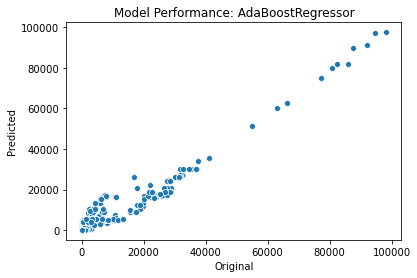

In [27]:
cnc = pd.DataFrame({"Original": np.array(final_model['y_test']),"Predicted": np.array(final_model['predict_y'])})
#Ploting using scatter plot
sns.scatterplot(x='Original',y='Predicted',data=cnc)
plt.title("Model Performance: AdaBoostRegressor")
plt.show()